# Will it rain tomorrow?

Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.shape

(145460, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Heatmap view-

<AxesSubplot:>

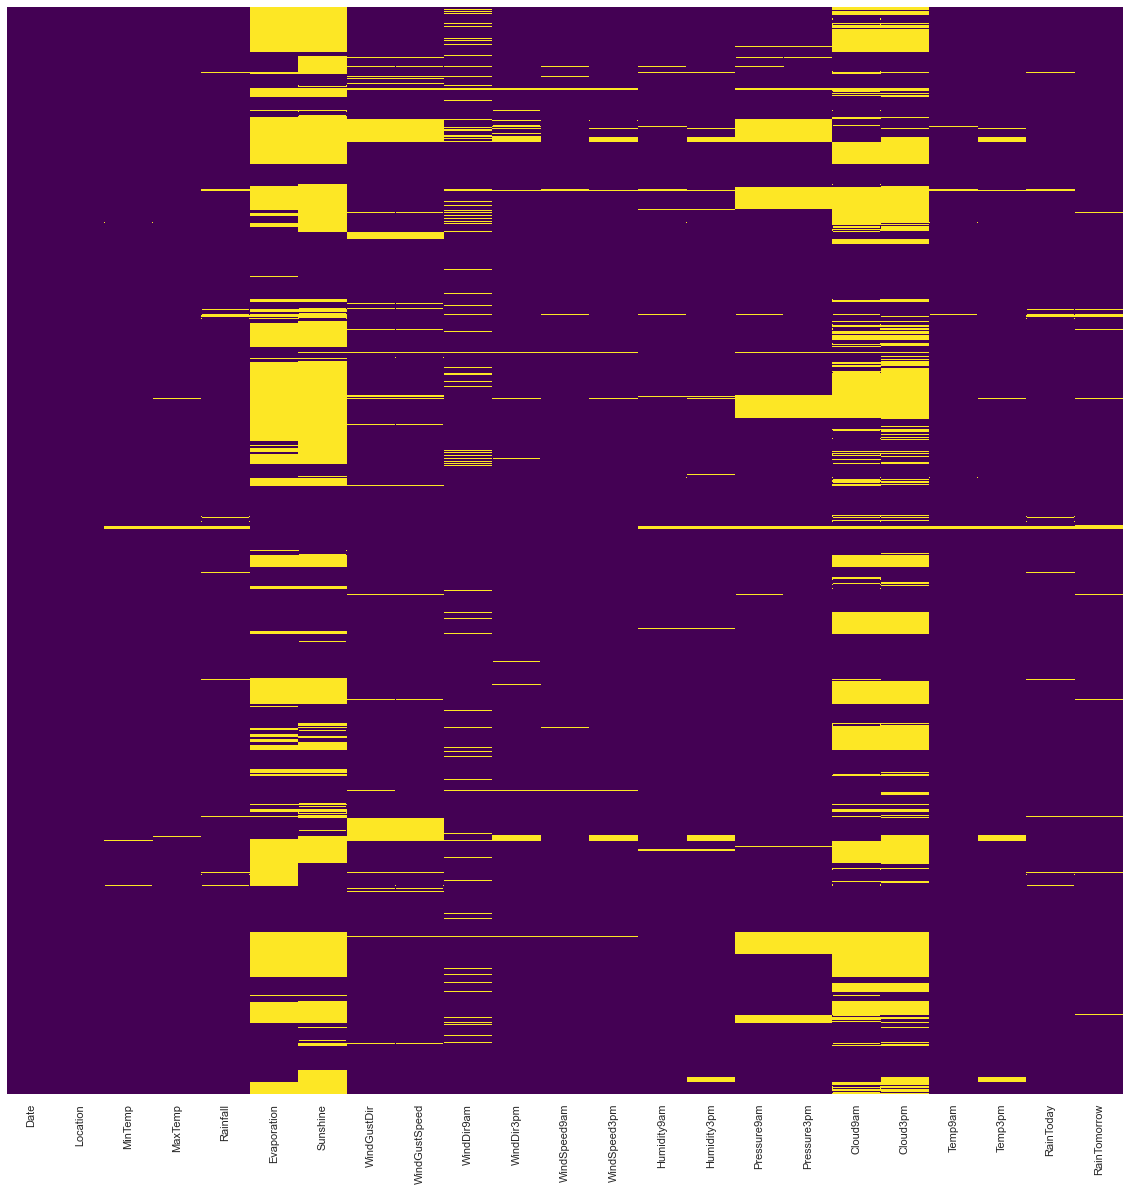

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

Taking care of the missing values.

In [8]:
import math

Replacing the missing MinTemp and MaxTemp values in the column by average of the last 10 values.

In [9]:
i=0
while i<len(df['MinTemp']):
    if math.isnan(df['MinTemp'][i]):
        j=1
        temp=0
        while j<=10:
            temp=df['MinTemp'][i-j]
            j=j+1
        temp=temp/10
        df['MinTemp'][i]=temp
    i=i+1        

In [10]:
i=0
while i<len(df['MaxTemp']):
    if math.isnan(df['MaxTemp'][i]):
        j=1
        temp=0
        while j<=10:
            temp=df['MaxTemp'][i-j]
            j=j+1
        temp=temp/10
        df['MaxTemp'][i]=temp
    i=i+1        

Replacing the missing values in Rainfall by average of the last 5 values.

In [11]:
i=0
while i<len(df['Rainfall']):
    if math.isnan(df['Rainfall'][i]):
        j=0
        temp=0
        while j<=5:
            temp=df['Rainfall'][i-j]
            j=j+1
        temp=temp/5
        df['Rainfall'][i]=temp
    i=i+1        

Replacing the missing values in RainToday,RainTomorrow by average of the mode of the remaining values in the column.

In [12]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

Replacing the missing values in WindDir9am,WindGustDir,WindDir3pm by average of the mode of the remaining values in the column.

In [13]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

Replacing the missing values in Cloud9am,Cloud3pm by average of the mode of the remaining values in the column.

In [14]:
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

Dropping the columns- Evaporation,Sunshine (because there are way too many missing values) and Location,Date (because they won't have any say in prediction). 

In [15]:
dic={}

In [16]:
dic['Location']=df['Location'].unique()

In [17]:
df = df.drop(["Evaporation","Sunshine","Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [18]:
df = df.dropna(axis = 0)
df.shape

(122319, 19)

In [19]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Now we use label encoding on the columns with non numeric values.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
coln=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [22]:
for c in coln:
    i=df[c].unique()
    df[c] = le.fit_transform(df[c])
    j=df[c].unique()
    n=0
    d={}
    while n<len(i):
        d[i[n]]=j[n]
        n=n+1
    if (c!='RainTomorrow'):
        dic[c]=d

In [23]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [24]:
dic

{'Location': array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
        'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
        'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
        'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
        'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
        'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
        'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object),
 'WindGustDir': {'W': 13,
  'WNW': 14,
  'WSW': 15,
  'NE': 4,
  'NNW': 6,
  'N': 3,
  'NNE': 5,
  'SW': 12,
  'ENE': 1,
  'SSE': 10,
  'S': 8,
  'NW': 7,
  'SE': 9,
  'ESE': 2,
  'E': 0,
  'SSW': 11},
 'WindDir9am': {'W': 13,
  'NNW': 6,
  'SE': 9,
  'ENE': 1,
  'SW': 12

In [25]:
x = np.array(df.drop(['RainTomorrow'], axis = 1))
y = np.array(df['RainTomorrow'])

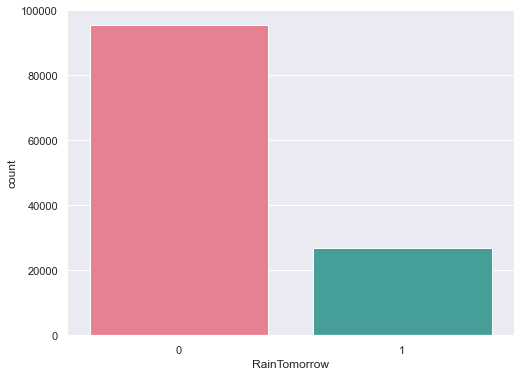

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(df['RainTomorrow'],palette='husl');

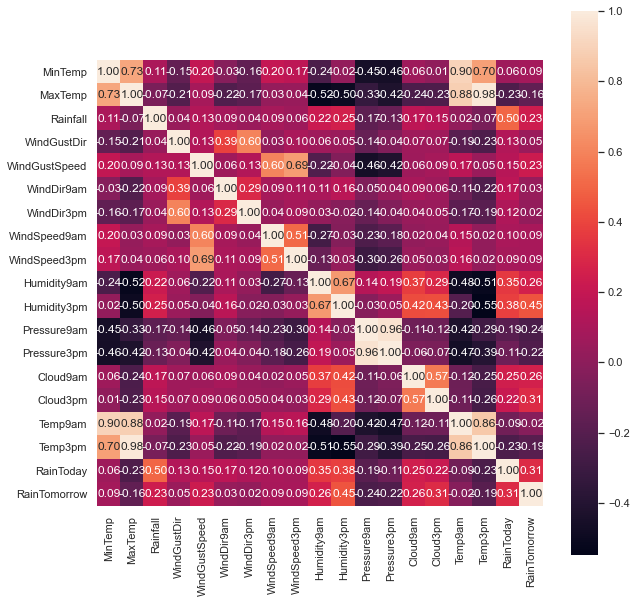

In [27]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

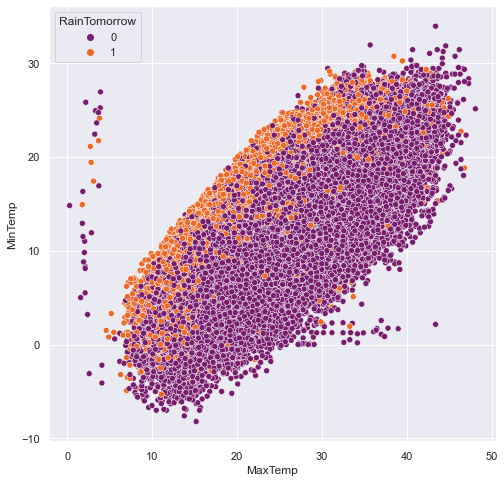

In [28]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

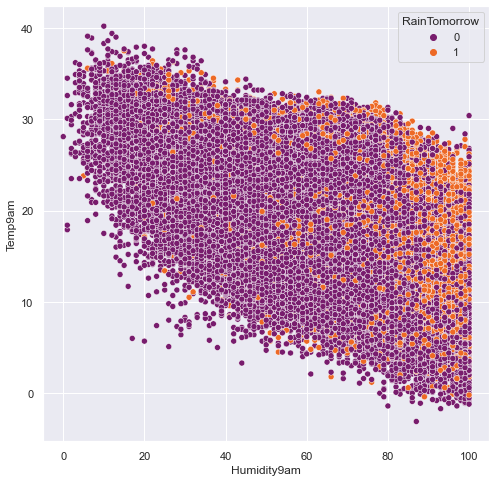

In [29]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot:>

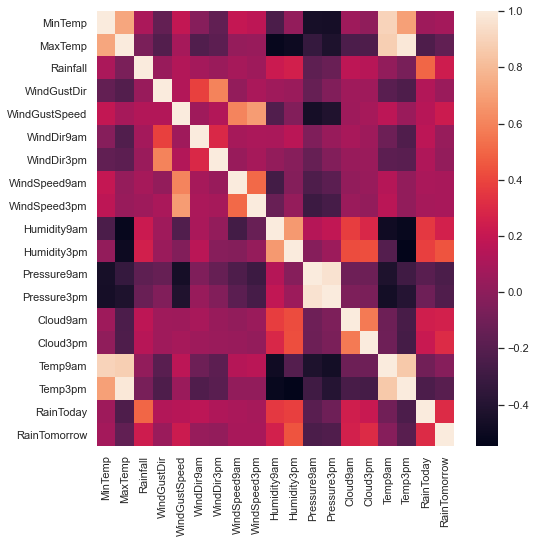

In [30]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Prediction by Logistic Regression.

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[18087   993]
 [ 2731  2653]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     19080
           1       0.73      0.49      0.59      5384

    accuracy                           0.85     24464
   macro avg       0.80      0.72      0.75     24464
weighted avg       0.84      0.85      0.84     24464

0.8477763243950295


Prediction by Random Forest.

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=8)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[18417   663]
 [ 2942  2442]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     19080
           1       0.79      0.45      0.58      5384

    accuracy                           0.85     24464
   macro avg       0.82      0.71      0.74     24464
weighted avg       0.85      0.85      0.84     24464

0.8526406147809026


Prediction by Xtreme Gradient Boosting.

In [35]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print('acc',accuracy_score(y_test,pred))
print('f1',classification_report(y_test,pred))
print('matrix',confusion_matrix(y_test,pred))

acc 0.8570961412688032
f1               precision    recall  f1-score   support

           0       0.88      0.95      0.91     19080
           1       0.74      0.54      0.63      5384

    accuracy                           0.86     24464
   macro avg       0.81      0.74      0.77     24464
weighted avg       0.85      0.86      0.85     24464

matrix [[18046  1034]
 [ 2462  2922]]


In [36]:
xgbacc=accuracy_score(y_test, predictions)

In [37]:
l=[13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0]
len(l)

18

In [38]:
lr.predict([l])

array([0])

In [39]:
rf.predict([l])

array([0])

In [40]:
l=np.array(l)

In [41]:
xgb.predict([l])

array([0])

In [42]:
import pickle
with open('rainpredxgb_pkl', 'wb') as files:
    pickle.dump([xgb,xgbacc,dic], files)

In [43]:
# with open('rainpredxgb_pkl', 'rb') as f:
#     xgb=pickle.load(f)
# xgb[0].predict([l])